In [37]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set()

def bin_search(x,target):
    # only even size of x for now
    
    found = False
    i = 1
    
    while not found:
        if len(x) == 1:
            print ('\nthe searched number is',x,' and we found it with {} questions'.format(i-1))
            found = True
            break
            
        else:
            
            x1 = x[: len(x) // 2]
            x2 = x[len(x) // 2 :]
        
        if target in x1:
            x = x1
            
        else:
            x = x2
            
        print ('after {} questions, we know that target is in range  [{}..{}]'.format(i,x[0],x[-1]))
        i += 1

hidden_nr = int(52)
arr = np.arange(1, hidden_nr + 1) 

print ('++++++++++')
bin_search(arr,15)
print ()



++++++++++
after 1 questions, we know that target is in range  [1..26]
after 2 questions, we know that target is in range  [14..26]
after 3 questions, we know that target is in range  [14..19]
after 4 questions, we know that target is in range  [14..16]
after 5 questions, we know that target is in range  [15..16]
after 6 questions, we know that target is in range  [15..15]

the searched number is [15]  and we found it with 6 questions



In [38]:
# returns entropy for 1 symbol, i.e. one draw
def e(p):
    
    if ~np.any(p):
        print ('warning - zeros in entropy function! ')
    return -np.sum(p * np.log2(p))


In [39]:
arr_norm = (1 / 2 ** np.arange(1,11))

arr_norm /= arr_norm.sum()

print (e(arr_norm))



1.9888152586798349


In [49]:
# entropy of ordered deck = 0
# entropy of pulling 1 card out of a deck of 52
# entropy of total perfectly suffled deck = E * 52

nr_cards = 4

# calculate entropy of total deck for pulling all cards, one-by-one
cards_remaining = nr_cards

E_per_card = np.zeros(cards_remaining)

def walk_deck(cards_remaining):
    namnare = np.ones(cards_remaining) * cards_remaining
    taljare = np.ones_like(namnare)
    p = taljare / namnare
    E = e(p)
    return E

for i,card in enumerate(range(cards_remaining,0,-1)):
    
    E_per_card[i] = walk_deck(card)
    
E_deck = E_per_card.sum()
print (E_per_card)
E_deck

[ 2.         1.5849625  1.        -0.       ]


4.584962500721156

In [48]:
from scipy.special import factorial

np.log2(factorial(nr_cards))

225.5810031237028

In [42]:
# shuffle a perfectly ordered deck


def perfect_shuffle(cards,even=False):
    
    out = np.zeros_like(cards)
    
    nr_cards = len(cards)
    
    if even:
        first_half = cards[:nr_cards // 2]
        second_half = cards[nr_cards // 2 :]
    
    else:
        second_half = cards[:nr_cards // 2]
        first_half = cards[nr_cards // 2 :]
        
    i = 0
    j = 0
    while i < nr_cards // 2:
        
        out[j] = first_half[i]
        out[j+1] = second_half[i]
        
        j += 2
        i += 1
    
    return out

def non_perfect_shuffle(cards):
    
    out = np.zeros_like(cards)
    nr_cards = len(cards)
    
    first_half = cards[: nr_cards // 2]
    second_half = cards[nr_cards // 2 :]
    
    first_idx = 0
    second_idx = 0
    out_idx = 0
    
    while out_idx < nr_cards:
        
        l_pick = np.random.choice(range(10))
        for l in range(l_pick):
            if first_idx < (nr_cards // 2 ) and out_idx < (nr_cards):
                out[out_idx] = first_half[first_idx]
                out_idx += 1
                first_idx += 1
            
        r_pick = np.random.choice(range(5))
        for r in range(r_pick):
            if second_idx < (nr_cards // 2 ) and out_idx < (nr_cards ):
                out[out_idx] = second_half[second_idx]
                out_idx += 1
                second_idx += 1
         
    return out
                

def random_shuffle(cards): #swap position of 2 cards
    for i in range (1):
        a,b = np.random.choice(range(nr_cards),2)
        cards[a],cards[b] = cards[b],cards[a]
    
    return cards
    

perfect_deck = np.arange(0,nr_cards)

def dist(cards,norm=True):
    
    out = np.zeros_like(cards)
    
    for i in range(len(out) - 1):
        out[i] = cards[i + 1] - cards[i]
        
    out[-1] = cards[-1] - cards[0]       
        
    for i in range(len(out)): # if negative dist, add maximum value. A bit strange...
        if out[i] < 0:
            out[i] += (nr_cards -1)
            
    ''' 
    if out.sum() == 0:
        raise ValueError
    '''    
    if norm:
        out = out / out.sum() # normalize
        return out[out != 0]
        
    return out

    
deck = perfect_deck.copy()

# after 8 perfect shuffles the perfect deck is restored!

nr_shuffles = 20


perfect_shuffles = np.zeros(nr_shuffles + 1)

print ('perfect deck',deck)

for shuffle in range(nr_shuffles):
    #print ('shuffle',shuffle)
    deck = perfect_shuffle(deck, shuffle % 2 == 0)
    #print (deck[: len(deck) // 2])
    #print (deck[len(deck) // 2 : ])
    try:
        delta_pos = dist(deck)
        
        E_after_shuffle = e(delta_pos)
        perfect_shuffles[shuffle +1] = E_after_shuffle
        #print (E_after_shuffle)
    except ValueError:
        print ('WARNING: all distances zero at shuffle nr {}'.format(shuffle))


random_shuffles = np.zeros(nr_shuffles +1)

deck = perfect_deck.copy()

for shuffle in range(nr_shuffles):
    deck = random_shuffle(deck)
    
    try:
        delta_pos = dist(deck)
        E_after_shuffle = e(delta_pos)
        random_shuffles[shuffle + 1] = E_after_shuffle
    except ValueError:
        print ('WARNING: all distances zero at shuffle nr {}'.format(shuffle))
        

non_perfect_shuffles = np.zeros(nr_shuffles + 1)

deck = perfect_deck.copy()

for shuffle in range(nr_shuffles):
    deck = non_perfect_shuffle(deck)
    
    try:
        delta_pos = dist(deck)
        E_after_shuffle = e(delta_pos)
        non_perfect_shuffles[shuffle + 1] = E_after_shuffle
    except ValueError:
        print ('WARNING: all distances zero at shuffle nr {}'.format(shuffle))
        

perfect deck [0 1 2 3]


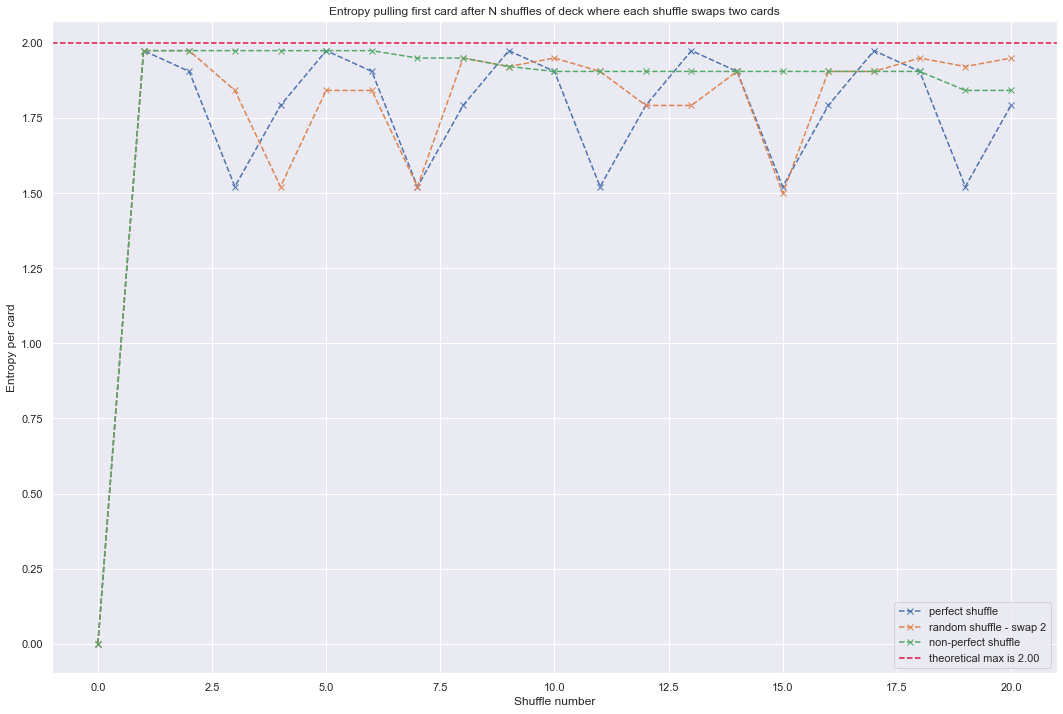

In [43]:
plt.figure(figsize=(18,12))
plt.plot(perfect_shuffles,'x--',label='perfect shuffle')
plt.plot(random_shuffles,'x--',label='random shuffle - swap 2')
plt.plot(non_perfect_shuffles,'x--',label='non-perfect shuffle')
plt.title('Entropy pulling first card after N shuffles of deck where each shuffle swaps two cards')
plt.xlabel('Shuffle number')
plt.ylabel('Entropy per card')

plt.axhline(E_per_card[0],color='crimson',ls='dashed',label='theoretical max is {:.2f}'.format(E_per_card[0]))
plt.legend(loc='lower right')

In [44]:
print (perfect_shuffles)
print (random_shuffles)
print (non_perfect_shuffles)

[0.         1.9749375  1.90563906 1.52192809 1.79248125 1.9749375
 1.90563906 1.52192809 1.79248125 1.9749375  1.90563906 1.52192809
 1.79248125 1.9749375  1.90563906 1.52192809 1.79248125 1.9749375
 1.90563906 1.52192809 1.79248125]
[0.         1.9749375  1.9749375  1.84237099 1.52192809 1.84237099
 1.84237099 1.52192809 1.95021206 1.92192809 1.95021206 1.90563906
 1.79248125 1.79248125 1.90563906 1.5        1.90563906 1.90563906
 1.95021206 1.92192809 1.95021206]
[0.         1.9749375  1.9749375  1.9749375  1.9749375  1.9749375
 1.9749375  1.95021206 1.95021206 1.92192809 1.90563906 1.90563906
 1.90563906 1.90563906 1.90563906 1.90563906 1.90563906 1.90563906
 1.90563906 1.84237099 1.84237099]


[[0 1 2 3]
 [0 1 3 2]
 [0 2 1 3]
 [0 2 3 1]
 [0 3 1 2]
 [0 3 2 1]
 [1 0 2 3]
 [1 0 3 2]
 [1 2 0 3]
 [1 2 3 0]
 [1 3 0 2]
 [1 3 2 0]
 [2 0 1 3]
 [2 0 3 1]
 [2 1 0 3]
 [2 1 3 0]
 [2 3 0 1]
 [2 3 1 0]
 [3 0 1 2]
 [3 0 2 1]
 [3 1 0 2]
 [3 1 2 0]
 [3 2 0 1]
 [3 2 1 0]]
[1.79248125 1.95021206 1.9749375  1.92192809 1.84237099 1.90563906
 1.95021206 1.90563906 1.84237099 1.5        1.52192809 1.95021206
 1.92192809 1.84237099 1.90563906 1.52192809 1.5        1.92192809
 1.5        1.52192809 1.95021206 1.5849625  1.92192809 1.5849625 ]
[6. 7. 9. 5. 7. 8. 7. 8. 7. 4. 5. 7. 5. 7. 8. 5. 4. 5. 4. 5. 7. 3. 5. 6.]
    0  1  2  3  Dist         E
0   0  1  2  3   6.0  1.792481
1   0  1  3  2   7.0  1.950212
2   0  2  1  3   9.0  1.974938
3   0  2  3  1   5.0  1.921928
4   0  3  1  2   7.0  1.842371
5   0  3  2  1   8.0  1.905639
6   1  0  2  3   7.0  1.950212
7   1  0  3  2   8.0  1.905639
8   1  2  0  3   7.0  1.842371
9   1  2  3  0   4.0  1.500000
10  1  3  0  2   5.0  1.521928
11  1  3  2  0   7.0

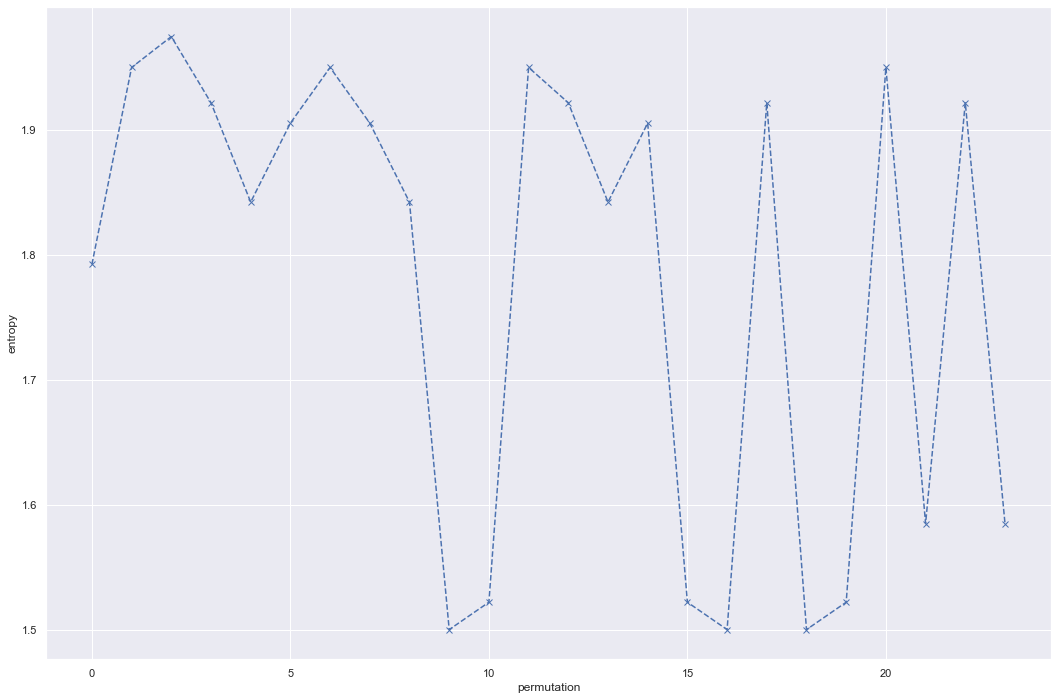

In [45]:
if nr_cards < 5: 
    
    from itertools import permutations

    deck = perfect_deck.copy()

    all_perm = np.array(list(permutations(deck,len(deck))))

    print (all_perm)

    e_per_perm = np.zeros(all_perm.shape[0])
    dist_per_perm = np.zeros(all_perm.shape[0])

    for i,perm in enumerate(all_perm):
        e_per_perm[i] = e(dist(perm)) 
        dist_per_perm[i] = dist(perm,norm=False).sum()
        

    print (e_per_perm)
    print (dist_per_perm)
    
    perm_df = pd.DataFrame.from_records(all_perm)
    perm_df['Dist'] = dist_per_perm
    perm_df['E'] = e_per_perm
    
    print (perm_df)

    plt.figure(figsize=(18,12))
    plt.plot(e_per_perm,'x--')
    plt.xlabel('permutation')
    plt.ylabel('entropy')



In [46]:
predictions = np.zeros(nr_cards)

def check_predict(shuffled_cards):
    
    for i in range(len(shuffled_cards)):
        if i == 0:
            prediction = 0
        else:
            prediction = shuffled_cards[i-1] + 1
            
        predictions[i] = prediction
        
    return predictions == shuffled_cards

correct_predictions = np.zeros(len(all_perm))

for i,p in enumerate(all_perm):
    print (check_predict(p),sum(check_predict(p)))
    correct_predictions[i] = check_predict(p).sum()
    
perm_df['correct_predictions'] = correct_predictions
    
perm_df

[ True  True  True  True] 4
[ True  True False False] 2
[ True False False False] 1
[ True False  True False] 2
[ True False False  True] 2
[ True False False False] 1
[False False False  True] 1
[False False False False] 0
[False  True False False] 1
[False  True  True False] 2
[False False False False] 0
[False False False False] 0
[False False  True False] 1
[False False False False] 0
[False False False False] 0
[False False False False] 0
[False  True False  True] 2
[False  True False False] 1
[False False  True  True] 2
[False False False False] 0
[False False False False] 0
[False False  True False] 1
[False False False  True] 1
[False False False False] 0


,0,1,2,3,Dist,E,correct_predictions
0,0,1,2,3,6.0,1.792481,4.0
1,0,1,3,2,7.0,1.950212,2.0
2,0,2,1,3,9.0,1.974938,1.0
3,0,2,3,1,5.0,1.921928,2.0
4,0,3,1,2,7.0,1.842371,2.0
5,0,3,2,1,8.0,1.905639,1.0
6,1,0,2,3,7.0,1.950212,1.0
7,1,0,3,2,8.0,1.905639,0.0
8,1,2,0,3,7.0,1.842371,1.0
9,1,2,3,0,4.0,1.500000,2.0
